# Iris Dataset with SGD using scikit-learn

In [11]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score


Iris = load_iris()

X_Data = Iris.data
Y_Data = Iris.target


X_train, X_test, Y_train, Y_test = train_test_split(X_Data, Y_Data, random_state = 0)


model = Perceptron(eta0=0.1, max_iter=100)
model.fit(X_train, Y_train)


Y_Pred_train = model.predict(X_train)
Y_Pred_test = model.predict(X_test)


print('Training Accuracy :{:.2f}%'.format(100*accuracy_score(Y_train, Y_Pred_train)))
print('Test Accuracy :{:.2f}%'.format(100*accuracy_score(Y_test, Y_Pred_test)))

Training Accuracy :93.75%
Test Accuracy :86.84%


# 2 Class MNIST

In [13]:
!pip install gdown
!gdown --id 1n70aILNV1U8I2VJlYekKuhBGbrNtCUNb
!tar -xvf mnist_49.tar
!rm -f mnist_49.tar

X_train = np.load('mnist_49/X_train.npy')
X_test = np.load('mnist_49/X_test.npy')
Y_train = np.load('mnist_49/Y_train.npy')
Y_test = np.load('mnist_49/Y_test.npy')

Downloading...
From: https://drive.google.com/uc?id=1n70aILNV1U8I2VJlYekKuhBGbrNtCUNb
To: /content/mnist_49.tar
10.9MB [00:00, 172MB/s]
mnist_49/
mnist_49/X_train.npy
mnist_49/X_test.npy
mnist_49/Y_test.npy
mnist_49/Y_train.npy
mnist_49/MNIST Copyright.txt


Shape of data: (28, 28)
Number of train data: 11791
Number of test data: 1991


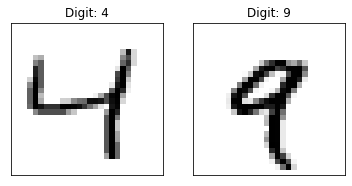

In [39]:
print('Shape of data: {}'.format(X_train.shape[1:]))
print('Number of train data: {}'.format(len(Y_train)))
print('Number of test data: {}'.format(len(Y_test)))

plt.subplot(1, 2, 1)
plt.title('Digit: 4')
plt.xticks([])
plt.yticks([])
plt.imshow(X_train[Y_train==0][0], cmap='gray_r')


plt.subplot(1, 2, 2)
plt.title('Digit: 9')
plt.xticks([])
plt.yticks([])
plt.imshow(X_train[Y_train==1][0], cmap='gray_r')
plt.show()

Training Accuracy :97.49%
Test Accuracy :96.74%


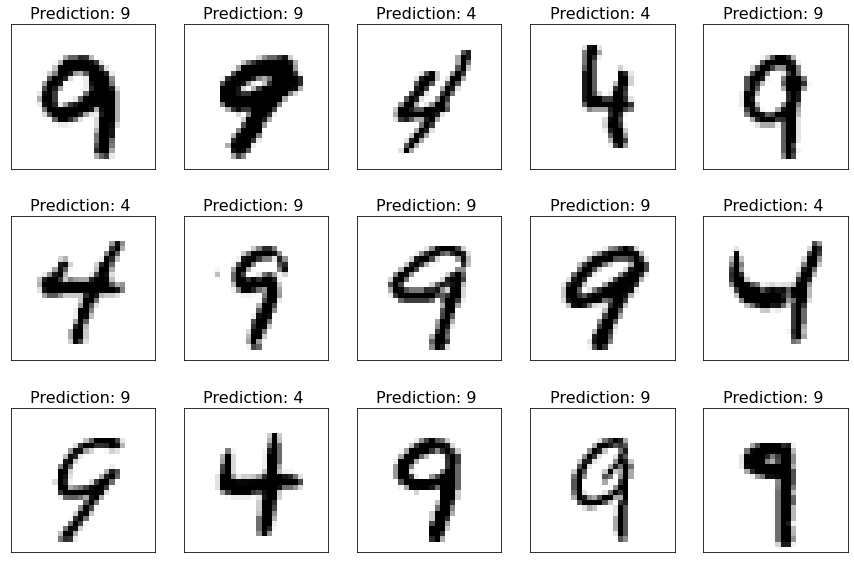

In [57]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
X_test_flatten = X_test.reshape(X_test.shape[0], -1)
X_train_std = X_train_flatten / 255
X_test_std = X_test_flatten / 255

model = Perceptron(eta0=0.1, max_iter=100)
model.fit(X_train_std, Y_train)


Y_Pred_train = model.predict(X_train_std)
Y_Pred_test = model.predict(X_test_std)




np.random.seed(0)
idxs = np.random.choice(len(Y_test), 15, replace=False)
label_to_class = {0: '4', 1: '9'}

plt.figure(figsize=(15, 10))
for i, idx in enumerate(idxs):
  plt.subplot(3, 5, i + 1)
  plt.xticks([])
  plt.yticks([])


  predict = model.predict(X_test_std)
  pred_label = (predict[idx] >= 0.5).astype(np.int)
  plt.imshow(X_test[idx], cmap='gray_r')
  plt.title('Prediction: {} '.format(label_to_class[pred_label]), fontsize=16)



print('Training Accuracy :{:.2f}%'.format(100*accuracy_score(Y_train, Y_Pred_train)))
print('Test Accuracy :{:.2f}%'.format(100*accuracy_score(Y_test, Y_Pred_test)))